In [1]:
import setup

In [2]:
from smarty.datasets import load_data

ds = load_data("datasets/iris.txt").batch(32).shuffle(1000)

In [3]:
ds.info()


DataSet at 0x104da6770
	Rows: 150
	Cols: 5

	name           	          dtype
	sepal_length   	        float32
	sepal_width    	        float32
	petal_length   	        float32
	petal_width    	        float32
	species        	           <U10



In [4]:
# naive bayes as all models don't accept categorical values, however here we use accuracy as metric
# so we can encode species only with simple encoder (naive bayes accepts only one target class)

from smarty.preprocessing.categorical import SimpleEncoder

encoder = SimpleEncoder()
target = ds.drop_c("species")
target = encoder.fit_transform(target.numpy())
ds.add_c(target, "species")

/Users/user/Desktop/projects/ml/examples/./../smarty/datasets/datasets.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  empty = np.where(col=='')[0]


In [5]:
# set target class as species (the last column in the ds, so we can use -1)
ds.set_target_classes(-1)


First 5 rows of DataSet at 0x104da6770:
        sepal_length     sepal_width      petal_length     petal_width      species          
     0  5.099999904632568  3.5              1.399999976158142  0.20000000298023224  0                
     1  4.900000095367432  3.0              1.399999976158142  0.20000000298023224  0                
     2  4.699999809265137  3.200000047683716  1.2999999523162842  0.20000000298023224  0                
     3  4.599999904632568  3.0999999046325684  1.5              0.20000000298023224  0                
     4  5.0              3.5999999046325684  1.399999976158142  0.20000000298023224  0                



In [6]:
from smarty.models.naive import NaiveBayesCLassifier

nb = NaiveBayes()
nb.fit(ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 1 epochs.
Epoch 1/1
	Step 1/1 - accuracy: 0.96, 



In [7]:
nb.evaluate(ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 5/5

accuracy: 0.96.


{'accuracy': 0.96}

In [8]:
# copy first 10 rows of ds and use them to evaluate the model
new = ds.drop_r(slice(0, 10), False)
nb.evaluate(new)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 1/1

accuracy: 1.0.


{'accuracy': 1.0}

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 5/5



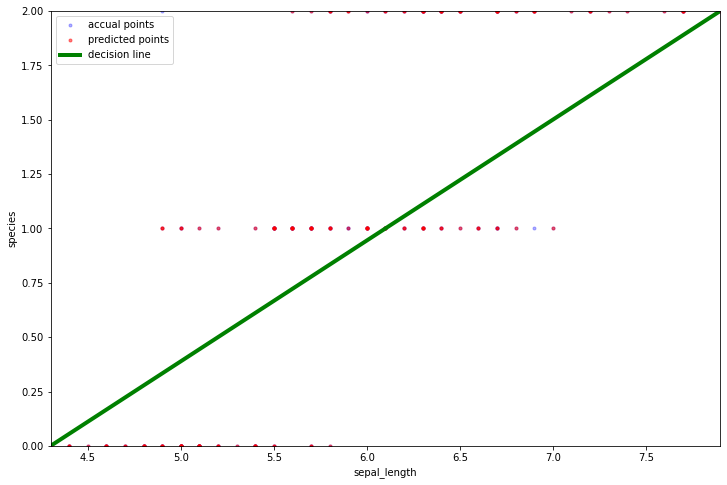

In [9]:
nb.plot(ds)

# although this plot in case of classification might look silly we can see linear
# correlation between sepal length and species